In [1]:
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt

In [2]:
def V_q(r,r_q,q):
    d12 = np.sqrt((r[0]-r_q[0])**2 + (r[1]-r_q[1])**2)
    return q/d12

def V_tot(r,r_qs,qs):
    V = np.zeros_like(r[0])
    for i in range(len(qs)):
        Vqi = V_q(r,np.array(r_qs[i]),qs[i])
        V += Vqi
    return V

def E_q(r,r_q,q):
    d32 = ((r[0]-r_q[0])**2 + (r[1]-r_q[1])**2)**1.5
    return (q*(r[0]-r_q[0]))/d32 , (q*(r[1]-r_q[1]))/d32

def E_tot(r,r_qs,qs):
    Ex,Ey = np.zeros_like(r[0]) , np.zeros_like(r[1])
    for i in range(len(qs)):
        E = E_q(r,np.array(r_qs[i]),qs[i])
        Ex += E[0]
        Ey += E[1]
    return Ex,Ey

In [3]:
x,y = np.linspace(-2.5,2.5,120) , np.linspace(-2.5,2.5,120)
XX , YY = np.meshgrid(x,y)

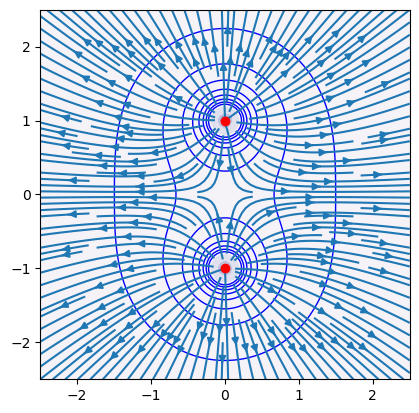

In [4]:
qs = [1,1]
r_qs = [[0,1],[0,-1]]
Ex,Ey = E_tot([XX,YY],r_qs,qs)
V = V_tot([XX,YY],r_qs,qs)
niveles = np.linspace(0,5,10)
plt.contourf(XX,YY,V,cmap='Purples')
niveles = np.linspace(0,5,10)
plt.contour(XX,YY,V,levels=niveles,colors='b',linewidths=(1,))
plt.streamplot(XX,YY,Ex,Ey,density=2)
for i in range(len(r_qs)):
    plt.plot(r_qs[i][0],r_qs[i][1],'ro')
plt.gca().set_aspect('equal')
plt.show()

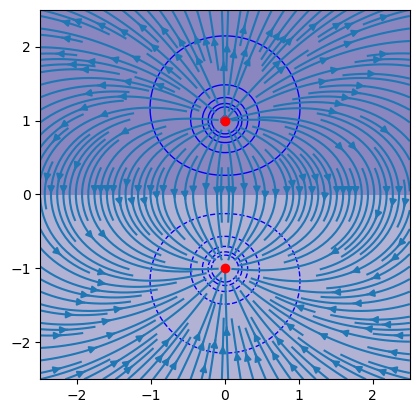

In [9]:
qs = [1,-1]
r_qs = [[0,1],[0,-1]]
Ex,Ey = E_tot([XX,YY],r_qs,qs)
V = V_tot([XX,YY],r_qs,qs)
niveles = np.linspace(-5,5,10)
plt.contourf(XX,YY,V,cmap='Purples')
plt.contour(XX,YY,V,levels=niveles,colors='b',linewidths=(1,))
plt.streamplot(XX,YY,Ex,Ey,density=2)
for i in range(len(r_qs)):
    plt.plot(r_qs[i][0],r_qs[i][1],'ro')
plt.gca().set_aspect('equal')
plt.show()

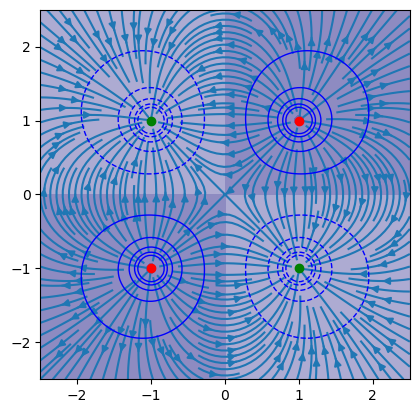

In [6]:
qs = [1,1,-1,-1]
r_qs = [[1,1],[-1,-1],[-1,1],[1,-1]]
Ex,Ey = E_tot([XX,YY],r_qs,qs)
V = V_tot([XX,YY],r_qs,qs)
plt.streamplot(XX,YY,Ex,Ey,density=2)
plt.contourf(XX,YY,V,cmap='Purples')
niveles = np.linspace(-5,5,10)
plt.contour(XX,YY,V,levels=niveles,colors='b',linewidths=(1,))
for i in range(len(r_qs)):
    if qs[i] > 0:
        plt.plot(r_qs[i][0],r_qs[i][1],'ro')
    else:
        plt.plot(r_qs[i][0],r_qs[i][1],'go')
plt.gca().set_aspect('equal')
plt.show()